# Getting the data

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Packing the data into matrices

In [5]:
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# Plotting selected features of two classes of Iris

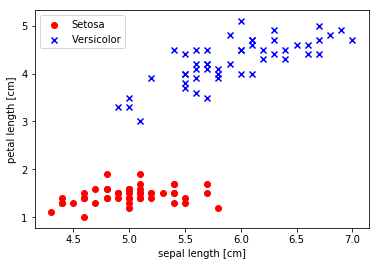

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Using a perceptron - experimenting with eta

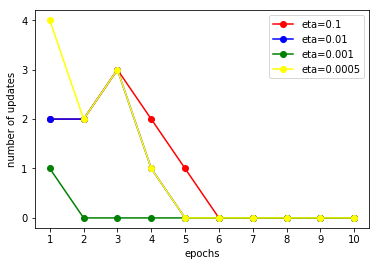

In [33]:
from perceptron import Perceptron
etas = [0.1, 0.01, 0.001, 0.0005]
colors = ['red', 'blue', 'green', 'yellow']
for i in range(len(etas)):
    ppn = Perceptron(eta=etas[i], n_iter=10)
    ppn.fit(X, y)
    plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o', color=colors[i], label='eta={}'.format(etas[i]))
plt.xlabel("epochs")
plt.ylabel("number of updates")
plt.xticks(range(1, 11))
plt.yticks(range(5))
plt.legend(loc='upper right')
plt.show()

# Plotting the decision regions

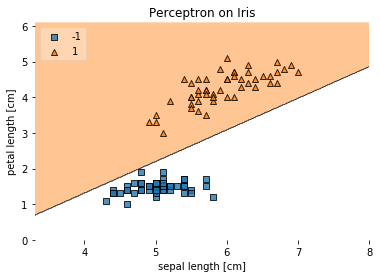

In [35]:
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(eta=0.001, n_iter=10)
ppn.fit(X, y)
plot_decision_regions(X, y, clf=ppn, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()

# Using AdaLiNe - experimenting with eta

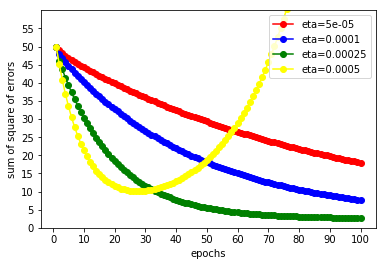

In [78]:
from adaline import AdaLiNe
n_iter = 100
etas = [0.00005, 0.0001, 0.00025, 0.0005]
colors = ['red', 'blue', 'green', 'yellow']
for i in range(len(etas)):
    ada = AdaLiNe(eta=etas[i], n_iter=n_iter)
    ada.fit(X, y)
    plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o', color=colors[i], label='eta={}'.format(etas[i]))
plt.xlabel("epochs")
plt.ylabel("sum of square of errors")
plt.xticks(range(0, n_iter+1, 10))
plt.yticks(range(0, 56, 5))
plt.ylim((0, 60))
plt.legend(loc='upper right')
plt.show()

# Let's standardize

In [79]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

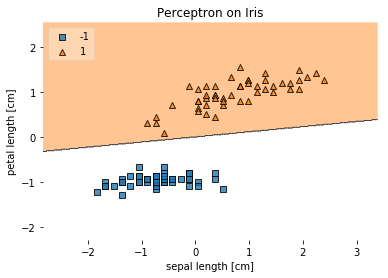

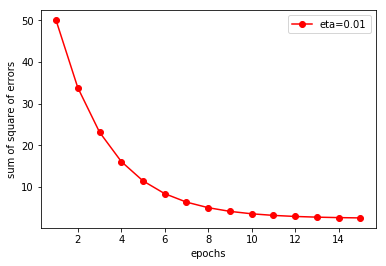

In [83]:
ada2 = AdaLiNe(eta=0.01, n_iter=15)
ada2.fit(X_std, y)

plot_decision_regions(X_std, y, clf=ada2, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron on Iris')
plt.show()

plt.plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o', color='red', label='eta={}'.format(0.01))
plt.xlabel("epochs")
plt.ylabel("sum of square of errors")
plt.legend(loc='upper right')
plt.show()